<a href="https://colab.research.google.com/github/aishani1903/Data-Analysis-Projects/blob/main/Startup_Profit_Pred_using_Multilinear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Predicting a Startups Profit/Success Rate using Multiple Linear Regression in Python-Download Data


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
x = df.iloc[:,:-1]
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [ ]:
y = df.iloc[:, 4]
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [ ]:
dummies = pd.get_dummies(x.State, drop_first=True)    #converting col into categorical col (drop_first drops one var since theyre multicolinear)
dummies

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0
5,0,1
6,0,0
7,1,0
8,0,1
9,0,0


In [ ]:
x = x.drop('State',axis=1)    #drop state column

In [ ]:
x = pd.concat([x, dummies],axis=1)    #concat dummies
x

,R&D Spend,Administration,Marketing Spend,Florida,New York,Florida,New York
0,165349.20,136897.80,471784.10,0,1,0,1
1,162597.70,151377.59,443898.53,0,0,0,0
2,153441.51,101145.55,407934.54,1,0,1,0
3,144372.41,118671.85,383199.62,0,1,0,1
4,142107.34,91391.77,366168.42,1,0,1,0
5,131876.90,99814.71,362861.36,0,1,0,1
6,134615.46,147198.87,127716.82,0,0,0,0
7,130298.13,145530.06,323876.68,1,0,1,0
8,120542.52,148718.95,311613.29,0,1,0,1
9,123334.88,108679.17,304981.62,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split      #splitting the dataset into training and testing data
tt = train_test_split

In [ ]:
xtrain, xtest, ytrain, ytest = tt(x,y, test_size = 0.45, random_state = 1)

##fitting multiple regression into training set

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##Predicting the test results

In [ ]:
ypred = lr.predict(xtest)

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(ytest, ypred)
score

0.9081463554182474

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, ypred)
mse

141228646.836447

##Visualization

In [ ]:
newdf = pd.DataFrame(ypred, ytest)
newdf

,0
Profit,
105008.31,115584.528953
96479.51,90443.818312
78239.91,80347.064805
81229.06,70977.800049
191050.39,178846.033384
182901.99,169518.914267
35673.41,48562.417845
101004.64,99693.426817
49490.75,63232.408769


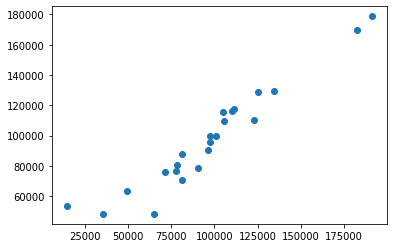

In [ ]:
plt.scatter(ytest,ypred, marker='o')
plt.show()